# Ted Malumbe Data Analytics with Python for Turtle Games Data Set

#  1. Data Importation

In [15]:
#Importing the python libraries
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date

#Import python visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#Import nltk and the required resources for NLP steps
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import words
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tedmalumbe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tedmalumbe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
#Load the dataset
lego = pd.read_csv("lego.csv")
games_review = pd.read_csv("game_reviews.csv")
games_sales = pd.read_csv("games_sales.csv")

# 2. Data Exploration

In [18]:
# Understanding the shape and nature of the data
lego.head(2)
# For further information on dataset remove the comment on info function
#lego.info()

ages  list_price  num_reviews  piece_count  play_star_rating  \
0    19       29.99            2          277               4.0   
1    19       19.99            2          168               4.0   

   review_difficulty  country  
0                  0       20  
1                  2       20

In [19]:
# Understanding the shape and nature of the data
games_review.head(2)
# For further information on dataset remove the comment on info function
#games_review.info()

overall  verified   reviewTime      reviewerID        reviewerName  \
0        2     False  09 22, 2016  A1IDMI31WEANAF      Mackenzie Kent   
1        1     False  09 18, 2016   A4BCEVVZ4Y3V3  Jonathan Christian   

                                          reviewText  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   

                                             summary  unixReviewTime image  
0  The fact that 50% of this space is wasted on a...      1474502400   NaN  
1  Another worthless Dungeon Master's screen from...      1474156800   NaN

In [20]:
# Understanding the shape and nature of the data
games_sales.head(2)
# For further information on dataset remove the comment on info function
#games_sales.info()

Rank               Name Platform    Year     Genre Publisher  NA_Sales  \
0     1         Wii Sports      Wii  2006.0    Sports  Nintendo     41.49   
1     2  Super Mario Bros.      NES  1985.0  Platform  Nintendo     29.08   

   EU_Sales  Global_Sales  
0     29.02         82.74  
1      3.58         40.24

## 2.1 Check for Missing Values

In [21]:
#Here we are trying to understand if there are any missing values in the dataset 
#print(games_sales.isnull())

In [22]:
#Here we are trying to understand if there are any missing values in the dataset 
# Other data sets of Lego and game sales do not have NAN values
#print(games_review['image'].isnull())

In [23]:
#Handing the missing values by replacing the NAN with 0, alternatively we can drop the column. TBC.
#print(games_review)
#games_review.fillna(0)

## 2.2 Changing Data Type

In [24]:
#Convert python pandas series dtype to datetime
#games_review = pd.to_datetime(games_review['reviewTime'])

In [25]:
#games_review.head(2)

# Data Description

In [26]:
#Quantitative data that we can apply descriptive statistics
games_review.describe()

overall  unixReviewTime
count  15000.000000    1.500000e+04
mean       4.574933    1.414857e+09
std        0.941795    7.449511e+07
min        1.000000    9.391680e+08
25%        5.000000    1.379527e+09
50%        5.000000    1.421366e+09
75%        5.000000    1.467677e+09
max        5.000000    1.525306e+09

# 3.1.1 What is the general sentiment of customers across all platforms

# Pre Processing and tokenization

In [27]:
#Slice DataFrames
games_review_pd = pd.DataFrame(games_review, columns = ["reviewText"])

# View shape of output
games_review_pd.shape

(15000, 1)

In [28]:
#Dropping missing values
games_review_pd.dropna(subset=["reviewText"], inplace=True)
games_review_pd.shape

(14990, 1)

In [29]:
#Change data to lowercase
games_review_pd["reviewText"] = games_review_pd["reviewText"].apply(lambda x: " ".join(x.lower() for x in x.split()))
#Check the results
games_review_pd["reviewText"].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: reviewText, dtype: object

In [30]:
#Remove punctuation
games_review_pd["reviewText"] = games_review_pd["reviewText"].str.replace('[^\w\s]','')
#View the data
games_review_pd["reviewText"].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: reviewText, dtype: object

In [31]:
#Removing warnings
import warnings
warnings.filterwarnings("ignore")

In [32]:
#Remove punctuation
games_review_pd["reviewText"] = games_review_pd["reviewText"].str.replace('[^\w\s]','')
#View the data
games_review_pd["reviewText"].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: reviewText, dtype: object

In [33]:
#Identifying the number of duplicates
games_review_pd.reviewText.duplicated().sum()

909

In [34]:
#Here we are removing the duplicates
games_review_new = games_review_pd.drop_duplicates(subset=["reviewText"])
games_review_new.reset_index(inplace=True)
games_review_new.head()

index                                         reviewText
0      0  when it comes to a dms screen the space on the...
1      1  an open letter to galeforce9 your unpainted mi...
2      2  nice art nice printing why two panels are fill...
3      3  amazing buy bought it as a gift for our new dm...
4      4  as my review of gf9s previous screens these we...

In [35]:
#Create an empty string variable
all_reviews = " "
for i in range(games_review_new.shape[0]):
    #Add each review
    all_reviews = all_reviews + games_review_new["reviewText"][i]

In [36]:
!pip install WordCloud

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#Set color palette
sns.set(color_codes=True)
#Create wordcloud object
word_cloud = WordCloud(width = 1600, height = 900,
                      background_color = 'White',
                      colormap= 'plasma',
                      stopwords = 'none',
                      min_font_size = 10).generate(all_reviews)

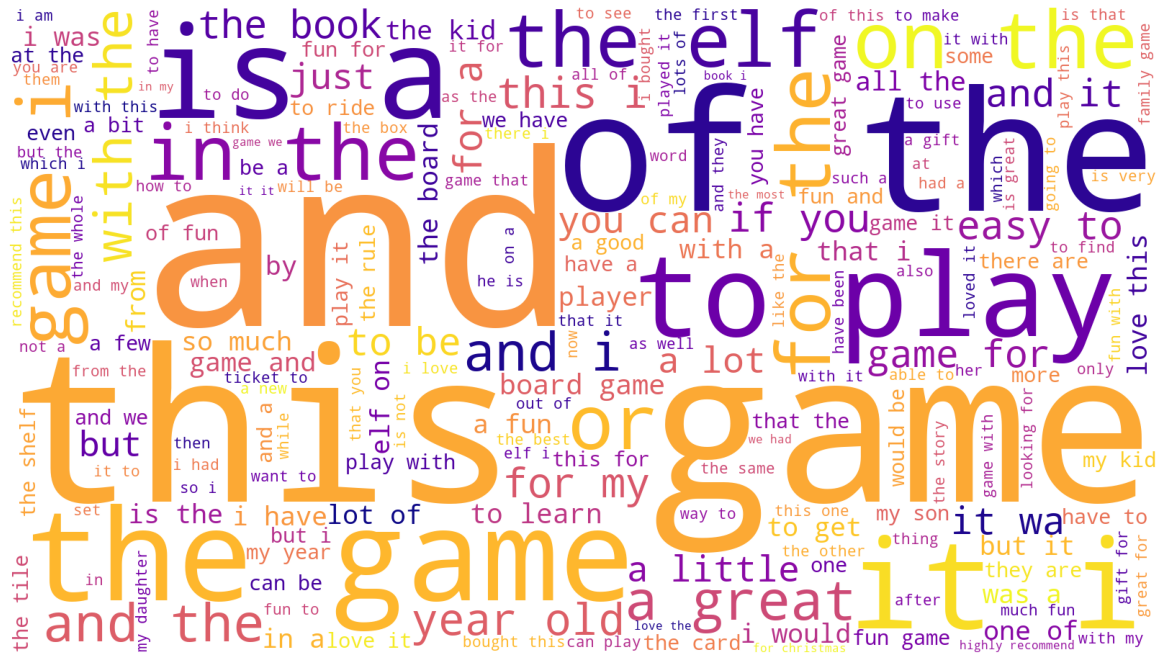

In [39]:
plt.figure(figsize = (16,9), facecolor = None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [40]:
!pip install nltk

In [41]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tedmalumbe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
#Tokenize the words
games_review_new['tokens'] = games_review_new['reviewText'].apply(word_tokenize)
#Check the tokenize result
games_review_new['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [43]:
#Define an empty list of tokens
all_tokens = []
for i in range(games_review_new.shape[0]):
    all_tokens = all_tokens + games_review_new['tokens'][i]

In [44]:
from nltk.probability import FreqDist
#Calculate the frequecy of distribution
fdist = FreqDist(all_tokens)
fdist

FreqDist({'the': 32797, 'to': 21453, 'and': 21000, 'a': 18570, 'it': 15144, 'i': 12845, 'game': 12379, 'this': 12257, 'is': 12169, 'of': 11815, ...})

In [45]:
tokens1 = [word for word in all_tokens if word.isalnum()]

In [46]:
#Download the stop word list
nltk.download('stopwords')
from nltk.corpus import stopwords
#Create a set of english stop words.
english_stopwords = set(stopwords.words('english'))
#Create a filtered list of tokens without stop words
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]
#Define an empty sring variable
tokens2_string = ''
for value in tokens2:
    #Add filtered line token word to the string
    tokens2_string = tokens2_string + value + ''
    import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tedmalumbe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
#Re-calling the wordcloud function for the new wordcloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Set color palette
sns.set(color_codes=True)
#Create wordcloud object
word_cloud = WordCloud(width = 1600, height = 900,
                      background_color = 'White',
                      colormap= 'plasma',
                      stopwords = 'none',
                      min_font_size = 10).generate(tokens2_string)
#There is a challenge creating this wordcloud, please ignore and move to the next one if it does not work.

In [ ]:
#Plot the Wordcloud Image
plt.figure(figsize = (16,9), facecolor = None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
#There is a challenge creating this wordcloud, please ignore and move to the next one if it does not work.

In [82]:
#Here we are looking at the frequency of the words 
fdist1 = FreqDist(tokens2)
fdist1

FreqDist({'game': 12379, 'fun': 5188, 'play': 4150, 'great': 4098, 'elf': 3285, 'love': 3031, 'one': 2982, 'family': 2818, 'kids': 2499, 'like': 2278, ...})

In [83]:
#Import the counter class
from collections import Counter
#Generate a dataframe from counter
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                     columns=['Word', 'Frequency']).set_index('Word')
#Display the result of most common words
counts

Frequency
Word             
game        12379
fun          5188
play         4150
great        4098
elf          3285
love         3031
one          2982
family       2818
kids         2499
like         2278
cards        2071
year         2021
get          2000
time         1992
would        1950

# 3.2.2 Using Python to extract sentiment scores from customer reviews

In [84]:
# Install vaderSentiment tool
!pip install VaderSentiment

In [85]:
# Import the necessary class.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an object from the class.
sia = SentimentIntensityAnalyzer()

In [86]:
# Define the input data.
sentences = games_review_new['tokens']

In [87]:
# Apply sentiment analysis.
for sentence in sentences:
    score = sia.polarity_scores(sentence)["compound"]
    print(f'The sentiment value of the sentence :"{sentence}" is : {score}')

The sentiment value of the sentence :"['when', 'it', 'comes', 'to', 'a', 'dms', 'screen', 'the', 'space', 'on', 'the', 'screen', 'itself', 'is', 'at', 'an', 'absolute', 'premium', 'the', 'fact', 'that', '50', 'of', 'this', 'space', 'is', 'wasted', 'on', 'art', 'and', 'not', 'terribly', 'informative', 'or', 'needed', 'art', 'as', 'well', 'makes', 'it', 'completely', 'useless', 'the', 'only', 'reason', 'that', 'i', 'gave', 'it', '2', 'stars', 'and', 'not', '1', 'was', 'that', 'technically', 'speaking', 'it', 'can', 'at', 'least', 'still', 'stand', 'up', 'to', 'block', 'your', 'notes', 'and', 'dice', 'rolls', 'other', 'than', 'that', 'it', 'drops', 'the', 'ball', 'completely']" is : 0.0
The sentiment value of the sentence :"['an', 'open', 'letter', 'to', 'galeforce9', 'your', 'unpainted', 'miniatures', 'are', 'very', 'not', 'bad', 'your', 'spell', 'cards', 'are', 'great', 'your', 'board', 'games', 'are', 'meh', 'your', 'dm', 'screens', 'however', 'are', 'freaking', 'terrible', 'im', 'stil

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [88]:
# Calculate the percentage of the output
for sentence in sentences:
    print(f'For the sentence "{sentence}"')
    # Calculate the scores.
    polarity = sia.polarity_scores(sentence)
    pos = polarity["pos"]
    neu = polarity["neu"]
    neg = polarity["neg"]

For the sentence "['when', 'it', 'comes', 'to', 'a', 'dms', 'screen', 'the', 'space', 'on', 'the', 'screen', 'itself', 'is', 'at', 'an', 'absolute', 'premium', 'the', 'fact', 'that', '50', 'of', 'this', 'space', 'is', 'wasted', 'on', 'art', 'and', 'not', 'terribly', 'informative', 'or', 'needed', 'art', 'as', 'well', 'makes', 'it', 'completely', 'useless', 'the', 'only', 'reason', 'that', 'i', 'gave', 'it', '2', 'stars', 'and', 'not', '1', 'was', 'that', 'technically', 'speaking', 'it', 'can', 'at', 'least', 'still', 'stand', 'up', 'to', 'block', 'your', 'notes', 'and', 'dice', 'rolls', 'other', 'than', 'that', 'it', 'drops', 'the', 'ball', 'completely']"
For the sentence "['an', 'open', 'letter', 'to', 'galeforce9', 'your', 'unpainted', 'miniatures', 'are', 'very', 'not', 'bad', 'your', 'spell', 'cards', 'are', 'great', 'your', 'board', 'games', 'are', 'meh', 'your', 'dm', 'screens', 'however', 'are', 'freaking', 'terrible', 'im', 'still', 'waiting', 'for', 'a', 'single', 'screen', 't

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [89]:
# Display the scores.
print(f'The percentage of positive sentiment in :"{sentence}" is : {round(pos*100,2)} %')
print(f'The percentage of neutral sentiment in :"{sentence}" is : {round(neu*100,2)} %')
print(f'The percentage of negative sentiment in :"{sentence}" is : {round(neg*100,2)} %')
print("="*50)

The percentage of positive sentiment in :"['this', 'has', 'been', 'our', 'lifesaver', 'our', '1', 'year', 'old', 'boy', 'is', 'very', 'handful', 'in', 'the', 'bath', 'he', 'stands', 'walks', 'and', 'crawls', 'in', 'the', 'tub', 'licks', 'the', 'bottom', 'of', 'the', 'tub', 'tries', 'to', 'drink', 'the', 'water', 'coming', 'out', 'of', 'the', 'faucet', 'he', 'just', 'never', 'stops', 'moving', 'but', 'now', 'he', 'is', 'so', 'into', 'this', 'toy', 'that', 'he', 'sits', 'in', 'the', 'tub', 'and', 'just', 'stares', 'at', 'it', 'bites', 'and', 'licks', 'it', 'for', 'a', 'good', 'amount', 'of', 'time']" is : 0.0 %
The percentage of neutral sentiment in :"['this', 'has', 'been', 'our', 'lifesaver', 'our', '1', 'year', 'old', 'boy', 'is', 'very', 'handful', 'in', 'the', 'bath', 'he', 'stands', 'walks', 'and', 'crawls', 'in', 'the', 'tub', 'licks', 'the', 'bottom', 'of', 'the', 'tub', 'tries', 'to', 'drink', 'the', 'water', 'coming', 'out', 'of', 'the', 'faucet', 'he', 'just', 'never', 'stops'

# 3.2.3 Top 20 or bottom 20 reviews and polarity of customer reviews

In [90]:
!pip install textblob

from textblob import TextBlob

In [101]:
# [1] Define a function to extract a polarity score for the comment.
def generate_polarity(reviewText):
    return TextBlob(reviewText).sentiment[0]

# [2] Populate a new column with polarity scores for each comment.
games_review_new['polarity'] = games_review_new["reviewText"].apply(generate_polarity)

# [3] Preview the result.
games_review_new['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

In [100]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(reviewText):
    return TextBlob(reviewText).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
games_review_new['subjectivity'] = games_review_new['reviewText'].apply(generate_subjectivity)

# Preview the result.
games_review_new['subjectivity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity, dtype: float64

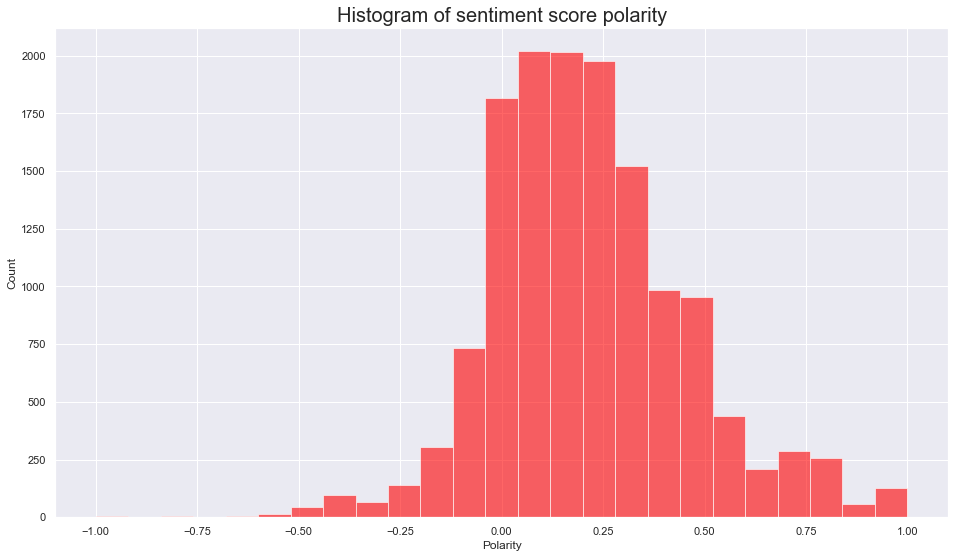

In [102]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(games_review_new['polarity'], num_bins, facecolor='red', alpha=0.6)
# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)
plt.show();

In [108]:
#Extract contextualised comments
# [1] Create a DataFrame.
positive_sentiment = games_review_new.nlargest(10, 'polarity')

# [2] Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['reviewText', 'polarity', 'subjectivity']]

# [3] Adjust the column width.
positive_sentiment.style.set_properties(subset=['reviewText'], **{'width': '1200px'})

In [112]:
# [1] Create a DataFrame.
positive_sentiment = games_review_new.nlargest(20, 'polarity')

# [2] Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['reviewText', 'polarity', 'subjectivity']]

# [3] Adjust the column width.
positive_sentiment.style.set_properties(subset=['reviewText'], **{'width': '1200px'})

In [113]:
# Create a DataFrame.
negative_sentiment = games_review_new.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['reviewText', 'polarity', 'subjectivity']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['reviewText'], **{'width': '1200px'})